## Worksheet 7:  *How many apples do you see?*

In this worksheet, you will use clustering as an image segmentation tool, which will allow you to (approximately) count apples in an image

Begin by importing `numpy`, `matplotlib.pyplot`, `KMeans` from `sklearn.cluster` as well as the package `PIL`

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
from skimage import measure

A. Read the image `Apples.jpg` with the function `PIL.Image.open`. Then, turn it into a numpy array, check its dimensions, and visualize it with `imshow`. Why does the image have 3 dimensions? what does each channel represent?

(1000, 649, 3)
[189 203 216]


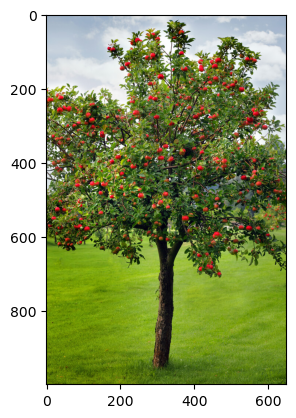

In [51]:
img = Image.open('./Apples.jpg')
img_arr = np.array(img)
print(img_arr.shape)
plt.imshow(img_arr)
# the 3 dimensions represent height, width, and number of color channels in the image
# The 3 channels are red, green, blue intensities 

B. **Clustering**: We will now regard each pixel in the image as a point in $R^3$. By clustering these points (pixels), which parts of the image do you think will be clustered together?

To do this, instanciate a k-means model with $k=8$ centers. Then, create a data matrix $X$ of dimensions $N \times 3$ where $N$ is the number of pixels in the image. Then, apply k-means to this data.

In [7]:
# I think the grass, tree root, tree leaves, apples, clouds, and sky will cluster together 

height, width, _ = img_arr.shape
num_pixels = height*width
X = img_arr.reshape(num_pixels, -1)
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X)

/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

C. What are the recovered clusters? To see this, obtain the cluster means using `model.cluster_centers_`, and visualize them with `plt.imshow`. Make sure these means are in a tensor of dimensions $(1\times k \times 3)$. What do these centers represent?

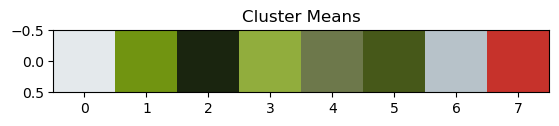

In [77]:
centers = kmeans.cluster_centers_

tensor_centers = centers.reshape(1,-1,3)
plt.imshow(tensor_centers/255)
plt.title('Cluster Means')
plt.show()

# the centers represent the position of the centroids found by the kmeans algorithm 

D. **Groupping and Simplifying** Now that you have obtained the clusters centers, you can compute the assignment of each pixel to each cluster. With these, produce an image that has at every pixel location the value of the cluster center (instead of the original pixel value). Visualize both the original and the new *simplified* image. What differences do you observe?

BONUS: By doing this, you have effectively **compressed** the original image, since you have replaced all possible colors in the image to just 8. Question: What is the compression ratio achieved by this method? ('size' of the compressed image / 'size' of the original image)?

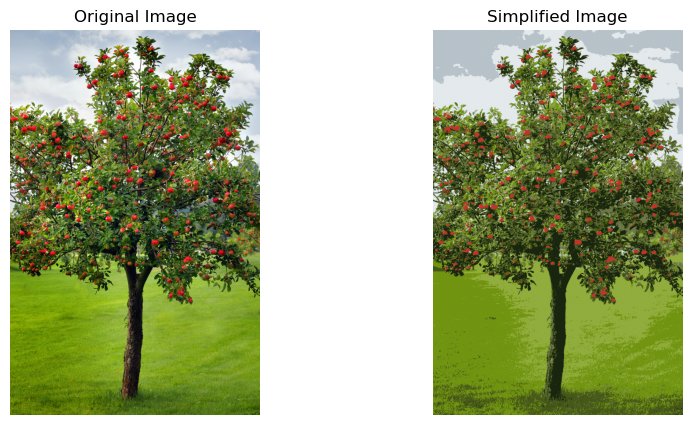

In [79]:
labels = kmeans.labels_
simplified_image = np.zeros_like(img_arr)
for i in range(height):
    for j in range(width):
        label = labels[i * width + j] 
        center = tensor_centers[0, label]
        simplified_image[i, j] = center

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(simplified_image/255)
plt.title('Simplified Image')
plt.axis('off')

plt.show()

# the new image looks more bland/less vibrant, and has rough seperations between different features of the image. 
# Bonus: since the amount of pixels doesn't change, the compression ratio is 3

E. **Segmentation** We can now use the obtained clusters to *segment* the image; i.e., break the image into its constituents parts and objects. With the obtained assignments from above, create two images: one containing only the apples, and one containing everything but the apples.

BON

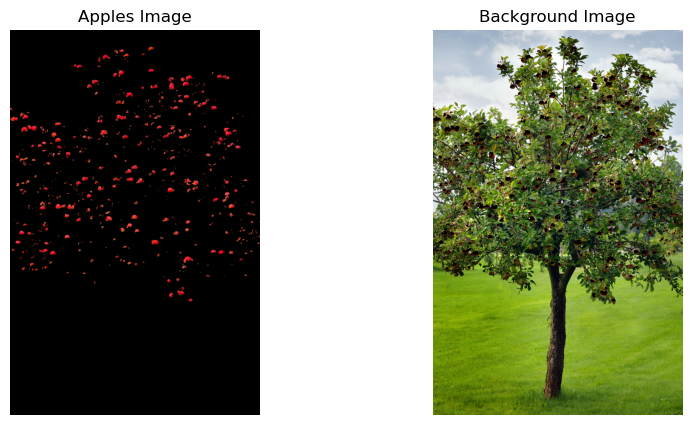

In [81]:
apples_indices = np.where(labels == 7)[0]
background_indices = np.where(labels != 7)[0]

apples_image = np.zeros_like(img_arr)
apples_image.reshape(-1, 3)[apples_indices] = img_arr.reshape(-1, 3)[apples_indices]
apples_image = apples_image.reshape(height, width, 3)

background_image = np.zeros_like(img_arr)
background_image.reshape(-1, 3)[background_indices] = img_arr.reshape(-1, 3)[background_indices]
background_image = background_image.reshape(height, width, 3)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(apples_image)
plt.title('Apples Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(background_image)
plt.title('Background Image')
plt.axis('off')

plt.show()

F. **Counting** Now that you have produced an image containing only apples, we can count them. To do this, use the function `measure.label` from the `skimage` package, which returns the individual connected componenets of the binarized map (which we assume represents an apple). Then, count how many componenets there are by counting how many different labels were returned by `measure.label`. How many apples are there in the image?


BONUS: Do you have any ideas on how this method for counting apples could be improved?

In [87]:
binary_image = np.any(apples_image != 0, axis=-1)
labeled_image = measure.label(binary_image)
print(labeled_image)
num_apples = np.max(labeled_image)
num_apples

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


673

In [ ]:
# it could be improved if we account for overlapping apples and different sized apples as 673 seems a bit high.